# Michiel's notebook on images

Collection of some scripts to do image manipulation

## Contents
0. Install modules: pillow, prettytable, Counter, PIL
1. PIL = Python Image Library
2. Webcolors
3. SkImage
3. SciKitlearn images 

## 0. Install modules

In [3]:
!pip install pillow

In [56]:
!pip install prettytable

  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13706 sha256=fce2353ad6854358883d5d03d4d4edabf480116f71e524ffbbad7da24ed1a4f3
  Stored in directory: C:\Users\Michiel\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built prettytable


In [58]:
!pip install Counter

  Created wheel for Counter: filename=Counter-1.0.0-cp37-none-any.whl size=5414 sha256=0a4b7b0f54c131160a4cae7d0981a25fd5e211257a0698b7a1805cb31d1ce513
  Stored in directory: C:\Users\Michiel\AppData\Local\pip\Cache\wheels\06\16\20\5f223d85f959078fee0f6f769c6aa32a6f653d9449c1b205c3
Successfully built Counter


## 1. PIL =  Python Image Library

The PIL / pillow library provides following methods:
 - Image.open => open an image
 - .load => load the data of the image
 - .size => returns the dimensions of the image (width*height)
 - .getdata => returns the data of the pixels
 
 !!! images are often too large for Jupyter to handle. Make sure your image is small enough.

In [117]:
import PIL
dir(PIL)

['BmpImagePlugin',
 'GifImagePlugin',
 'GimpGradientFile',
 'GimpPaletteFile',
 'Image',
 'ImageChops',
 'ImageColor',
 'ImageFile',
 'ImageMode',
 'ImagePalette',
 'ImageSequence',
 'ImageShow',
 'JpegImagePlugin',
 'JpegPresets',
 'PILLOW_VERSION',
 'PaletteFile',
 'PngImagePlugin',
 'PpmImagePlugin',
 'TiffImagePlugin',
 'TiffTags',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_util']

In [1]:
# Basic script: open and load an image with pillow and return 
from PIL import Image #import PIL.Image 
#im = Image.open('OpenCV.png') #open your image
im = Image.open('basilicum.jpg')
pix = im.load() # load the image
print(im.size) # print the size(w, h) of the image
print(pix[400,300])# print value for x, y number of pixels  
#print(pix[0,1]) # print more...
#im.show() #this will open a new window with the image

FileNotFoundError: [Errno 2] No such file or directory: 'basilicum.jpg'

In [2]:
# some basic operations of PIL

image1 = Image.open('OpenCV.png')
#rotate the image 90 degrees
#im_rot= image1.rotate(90)#.save('OpenCV_rot.png') #rotate the image
#im_rot.show()
# Convert the image to black and white
bl_w = image1.convert(mode='L')
bl_w.show()

FileNotFoundError: [Errno 2] No such file or directory: 'OpenCV.png'

In [105]:
# Convert RGBA to RGB
Image.open('OpenCV.png').convert('RGB').save('OpenCV_rgb.png')
im = Image.open('OpenCV.png')
im_rgb = Image.open('OpenCV_rgb.png')
pix = im.load()
pix_rgb = im_rgb.load()
print(pix[0,0]), print(pix_rgb[0,0])

(255, 255, 255, 0)
(255, 255, 255)


(None, None)

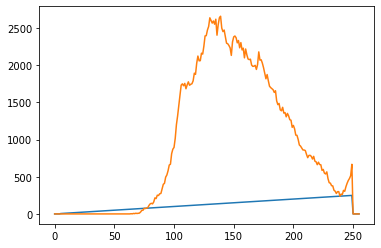

In [77]:
# split an image in to r,g,b, channels
from PIL import Image 

#inimg=Image.open("OpenCV.png").convert("RGB")
inimg=Image.open('basilicum.jpg').convert("RGB")

r,g,b=inimg.split()
list_g=[]
for i, value in enumerate(g.histogram()):
    pair = i, value
    list_g.append(pair)
    #print(i, value)

#type(list_r)
#print(list_r)   
#inimg.show()
#g.show()
#r.show()
#b.show()
list_g[-1]=(0,0)
list_g[-2]=(0,0)
list_g[-3]=(0,0)
list_g[-4]=(0,0)
list_g[-5]=(0,0)
list_g[-6]=(0,0)
list_g[0]=(0,0)
list_g[1]=(0,0)
list_g[2]=(0,0)
list_g[3]=(0,0)
list_g[4]=(0,0)
import matplotlib.pyplot as plt
plt.plot(list_g)
inimg.show()

In [1]:
import glob

import glob
jpgs = glob.glob('*.jpg')
jpgs

['buik3.jpg',
 'claxon_1m.jpg',
 'claxon_1m_log.jpg',
 'claxon_close.jpg',
 'claxon_close_log.jpg',
 'claxon_colorbar_log.jpg',
 'claxon_iphone_log.jpg',
 'claxon_michiel_log.jpg',
 'newimage.jpg',
 'output.jpg',
 'pixellib_example.jpg',
 'road.jpg',
 'road2.jpg',
 'scatter.jpg',
 'thuis.jpg',
 'Zebra_Zuid-Afrika.jpg']

In [6]:
# convert image from jpg to png
from PIL import Image
im = Image.open(r'road2.jpg')
im.save(r'road2.png')
im.show()

## 2. Webcolors

Webcolors is a python module to provide utility functions for working with standard color names as defined by HTML and CSS specs.

See: https://webcolors.readthedocs.io/en/1.10/

In [5]:
!pip install webcolors

In [17]:
#basic script
import webcolors
webcolors.hex_to_name('#daa520')
webcolors.name_to_rgb('lime')
webcolors.rgb_to_name((0,255,0))

'lime'

In [4]:
# script to find the closest webcolor available
# https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = (0,250,0)
actual_name, closest_name = get_colour_name(requested_colour)

print("Actual colour name:"+str(actual_name)+ ", closest colour name:"+str(closest_name))

Actual colour name:None, closest colour name:lime


In [86]:
# This is a working script that counts colours in RGB. Source: https://www.youtube.com/watch?v=CSU0Ar-koR4 + added functionality
from PIL import Image
from collections import Counter
import prettytable

img= Image.open("OpenCV_rgb.png")
#img = Image.open('basilicum.jpg')
size = w,h= img.size 
Opp = w*h
print(size)
print("This image has "+str(Opp)+" pixels.")
data = img.load()
colors = []
for x in range (w):
    for y in range (h):
        color = data[x,y]
        #print(color)
        colors.append(color)

counts = Counter(colors) # this creates a dictionary with key:value
#print(counts)
print(str(counts[(0,255,0)])+" pixels are green.")
perc_green = round((counts[0,255,0]/Opp)*100,2)
print(str(perc_green)+"% of the pixels in the image is green")
pt = prettytable.PrettyTable(["Color", 'Count'])

for color, count in Counter(colors).items():
    if pixel >= (0,150,0):# and pixel <=(0,255,0):
        pt.add_row([color, count])

print(pt)


(600, 739)
This image has 443400 pixels.
43594 pixels are green.
9.83% of the pixels in the image is green
+-----------------+--------+
|      Color      | Count  |
+-----------------+--------+
| (255, 255, 255) | 281998 |
|   (0, 255, 0)   | 43594  |
|    (0, 0, 0)    | 30605  |
|   (255, 0, 0)   | 43591  |
|   (0, 0, 255)   | 43612  |
+-----------------+--------+


In [126]:
### This is the script I send to Sensemakers
from PIL import Image
#im = Image.open('OpenCV.png').convert('RGB')
im = Image.open('basilicum.jpg').convert('RGB')
#pix = im.load()
print("w,h = "+str(im.size))
w,h=im.size
totaal_pix=w*h

white = 0
l_green = 0
d_green = 0
other = 0

for pixel in im.getdata():
    if pixel >= (250,250,250) and pixel <=(255,255,255):
        white += 1
    elif pixel >= (50,150,0) and pixel <(250,250,250): #it's a bit of a choice to define what is green and not green
        l_green += 1 # lightgreen
    elif pixel >=(0,80,0) and pixel <(50,150,0):
        d_green += 1 # darkgreen
    else:
        other += 1
print ('white= '+str(white)+' light green= ' + str(l_green)+ ' dark green= '+ str(d_green)+' other ='+str(other))
perc_green = ((l_green+d_green) / totaal_pix)*100
print(str(round(perc_green,2))+"% of the image is green")

w,h = (700, 700)
white= 247139 light green= 230955 dark green= 11906 other =0
49.56% of the image is green


In [ ]:
# set GPIO Pins
pinTrigger = 18
pinEcho = 24

def close(signal, frame):
	print("\nTurning off ultrasonic distance detection...\n")
	GPIO.cleanup() 
	sys.exit(0)

signal.signal(signal.SIGINT, close)

# set GPIO input and output channels
GPIO.setup(pinTrigger, GPIO.OUT)
GPIO.setup(pinEcho, GPIO.IN)

distance_list =[]
for i in range(0,5):
	# set Trigger to HIGH
	GPIO.output(pinTrigger, True)
	# set Trigger after 0.01ms to LOW
	time.sleep(0.00001)
	GPIO.output(pinTrigger, False)

	startTime = time.time()
	stopTime = time.time()

	# save start time
	while 0 == GPIO.input(pinEcho):
		startTime = time.time()

	# save time of arrival
	while 1 == GPIO.input(pinEcho):
		stopTime = time.time()

	# time difference between start and arrival
	TimeElapsed = stopTime - startTime
	# multiply with the sonic speed (34300 cm/s)
	# and divide by 2, because there and back
	distance = (TimeElapsed * 34300) / 2
    distance_list.append(distance)

	print ("Distance: %.1f cm" % distance)
	time.sleep(1)

## 3. Skimage: make a histogram

<function camera at 0x000001D343F5CCA0>


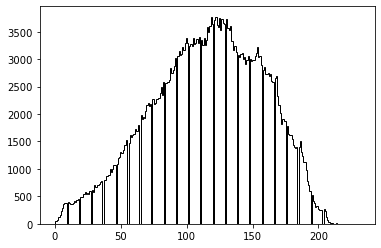

In [4]:
#Histogram Jupyter Notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data
cat = data.chelsea()
plt.hist(cat.ravel(), bins=256, histtype='step', color='black');
print(skimage.data.camera)

In [ ]:
# skimage.transform.resize : https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize
# skimage.transform.resize(image, output_shape, order=None, mode='reflect', cval=0, clip=True, 
#preserve_range=False, anti_aliasing=None, anti_aliasing_sigma=None)

from skimage import data
from skimage.transform import resize
image = data.camera()
resize(image, (100, 100)).shape

(100, 100)

## 4. SciPy : Importeren van foto's

Source: https://www.python-course.eu/python_image_processing.php

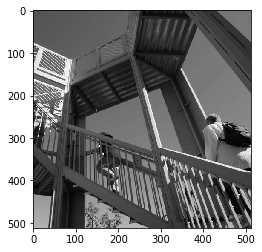

Metadata: datatype=int32 | size=(512, 512)


In [31]:
# the following line is only necessary in Python notebook:
#%matplotlib inline

#from scipy import misc

#ascent = misc.ascent()
import matplotlib.pyplot as plt
plt.imshow(ascent) #toon de file 'ascent' uit de bijbehorende library (dit is al een grayscale pic)
#plt.axis("off") #removes the axis 
plt.gray()
plt.show()
print("Metadata: "+"datatype="+ str(ascent.dtype)+" | size="+str(ascent.shape))


### Importing the racoon

(768, 1024, 3)
<built-in method max of numpy.ndarray object at 0x000001FF5B990A80>
uint8


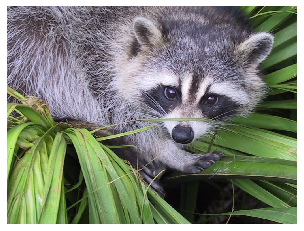

In [12]:
# Zelfde website voorbeeld wasbeer
import scipy.misc
import matplotlib.pyplot as plt
face = scipy.misc.face()
print(face.shape)
print(face.max)
print(face.dtype)
plt.axis("off")
#plt.gray()
plt.imshow(face)
plt.show()

### Otsu filter to select the foreground


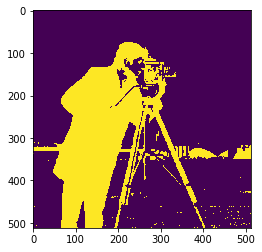

In [17]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
camera = data.camera()
val = filters.threshold_otsu(camera)
mask = camera < val
plt.imshow(mask)